# automatically parse battery data

In [16]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import sys
import copy
from scipy import signal


In [17]:
sys.path.append("FlowMater")
sys.path.append("IonLib/")

from dataframe_parse import add_unique_IDs
from scipy import fftpack

In [18]:
#data load
df_path="temp/df.bin"
df=joblib.load(df_path)
fp_keys=joblib.load("temp/all_fp_keys.bin")
anal_df=add_unique_IDs(df,fp_keys)

IonLib/dataframe_parse.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anal_df["Anneal"][anal_df["Anneal"] >= 1] = 1


In [19]:
processed_df=copy.copy(df)

In [20]:
processed_df[processed_df["battery_test_load_data"]==processed_df["battery_test_load_data"]]

,donor_amount_keyword,donor_amount_weight,donor_amount_compound name,donor_amount_SMILES,donor_amount_Mw,donor_amount_Mn,acceptor_amount_keyword,acceptor_amount_weight,acceptor_amount_compound name,acceptor_amount_SMILES,...,Formal salt ratio,Salt weight ratio,DSC (salt_melting_temperature),DSC (salt_melting_heat_energy),DSC (sample amount),1st Day (unix),2nd Day (unix),Date difference,Total ball mill time (min),Total heat time (min)
normal_experiment36_graph_integrated_json_0_database/experiments/MU/battery/922(806)/battery.graphml,PPO(Aldrich1),202 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Benzoquinone(TCI1),50 mg,Benzoquinone,O=C(C=C1)C=CC1=O,...,0.263683,0.524194,NaN,NaN,NaN,1.628176e+09,1.629558e+09,1382400.0,30.0,60.0
normal_experiment36_graph_integrated_json_1_database/experiments/MU/battery/922(806)/battery.graphml,PPO(Aldrich1),202 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Benzoquinone(TCI1),50 mg,Benzoquinone,O=C(C=C1)C=CC1=O,...,0.263683,0.524194,NaN,NaN,NaN,1.628176e+09,1.629558e+09,1382400.0,30.0,60.0
normal_experiment36_graph_integrated_json_2_database/experiments/MU/battery/922(806)/battery.graphml,PPO(Aldrich1),202 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Benzoquinone(TCI1),50 mg,Benzoquinone,O=C(C=C1)C=CC1=O,...,0.263683,0.524194,NaN,NaN,NaN,1.628176e+09,1.629558e+09,1382400.0,30.0,60.0
normal_experiment36_graph_integrated_json_3_database/experiments/MU/battery/922(806)/battery.graphml,PPO(Aldrich1),202 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Benzoquinone(TCI1),50 mg,Benzoquinone,O=C(C=C1)C=CC1=O,...,0.263683,0.524194,NaN,NaN,NaN,1.628176e+09,1.629558e+09,1382400.0,30.0,60.0
normal_experiment36_graph_integrated_json_4_database/experiments/MU/battery/922(806)/battery.graphml,PPO(Aldrich1),202 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Benzoquinone(TCI1),50 mg,Benzoquinone,O=C(C=C1)C=CC1=O,...,0.263683,0.524194,NaN,NaN,NaN,1.628176e+09,1.629558e+09,1382400.0,30.0,60.0
normal_experiment36_graph_integrated_json_5_database/experiments/MU/battery/922(806)/battery.graphml,PPO(Aldrich1),202 mg,PPO,[*]C1=CC(C)=C(O[*])C(C)=C1,NaN,NaN,Benzoquinone(TCI1),50 mg,Benzoquinone,O=C(C=C1)C=CC1=O,...,0.263683,0.524194,NaN,NaN,NaN,1.628176e+09,1.629558e+09,1382400.0,30.0,60.0


In [21]:
#load battery data
raw_data_dict={}

for i in range(processed_df.shape[0]):
    if not processed_df["battery_test_load_data"][i]==processed_df["battery_test_load_data"][i]:
        continue
    data_path=processed_df["battery_test_load_data"][i]

    parsed_data=[]

    with open(data_path) as f:
        lines=(f.read()).split("\n")
    
    for line in (lines):
        elements=line.split(",")
        if len(elements) !=2:
            continue
        try:
            float(elements[0]),float(elements[1])
        except:
            continue

        x=float(elements[0])
        y=float(elements[1])
        parsed_data.append((x, y))
    parsed_data=np.array(parsed_data)
        
    
    ind=processed_df.index[i]
    raw_data_dict[ind]=parsed_data


# Visualization

In [22]:
interested_conditions=["manual condition",
"battery_test_keyword",
"battery_test_rate",
"battery_test_load_data"]

sel_df=anal_df[anal_df["battery_test_load_data"]==anal_df["battery_test_load_data"]]
sel_df=sel_df[interested_conditions]


In [23]:
#data load
plot_dict={}

for i in range(sel_df.shape[0]):
    ind=sel_df.index[i]
    electrolyte=sel_df["manual condition"][i]
    cond=sel_df["battery_test_keyword"][i]+":"+sel_df["battery_test_rate"][i]
    plot_dict[electrolyte+":"+cond]=raw_data_dict[ind]
    


In [24]:
plot_dict.keys()

dict_keys(['OQM78-52HG:cyclic_voltammetry:0.5 mV/s', 'OQM78-52HG:chronopotentiometry:0.05 C', 'OQM78-52HG:chronopotentiometry:0.1 C', 'OQM78-52HG:chronopotentiometry:0.2 C', 'OQM78-52HG:chronopotentiometry:0.5 C', 'OQM78-52HG:chronopotentiometry:1 C'])

In [25]:
data=plot_dict[ 'OQM78-52HG:cyclic_voltammetry:0.5 mV/s']
data=plot_dict[ 'OQM78-52HG:chronopotentiometry:0.5 C']


In [26]:
from scipy.signal import find_peaks

def segmentation(d,order=1000,y_mode=True):
    
    if y_mode:
        y=d[:,1]
        x=d[:,0]
    else:
        y=d[:,0]
        x=d[:,1] 
    
    maxid, _ = find_peaks(y)
    
    #maxid = signal.argrelmax(y, order=order)
    #minid = signal.argrelmin(y, order=order) 
    plt.plot(x,y)
    plt.plot(x,y,'k-',label='original')
    plt.plot(x[maxid],y[maxid],'ro',label='peak')
    #plt.plot(x[minid],y[minid],'bo',label='peak min')
    plt.legend()

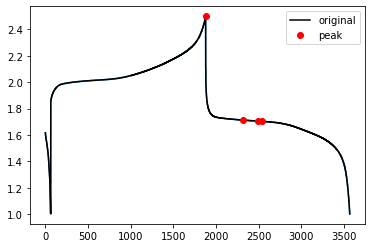

In [27]:
segmentation(data,order=2,y_mode=True)

In [28]:
y=data[:,1]
x=data[:,0]

In [29]:
#manual detection of peaks. slow, but accurate

split_range=1000
check_range=300

ind=0

max_ids=[]
min_ids=[]

for ind in range(int(y.shape[0]/split_range)):

    start_range=ind*split_range
    end_range=(ind+1)*split_range
    current_range=[start_range,end_range]

    selected_y=y[current_range[0]:current_range[1]]

    local_max=max(selected_y)
    local_min=min(selected_y)
    local_max_id=np.where(selected_y==local_max)[0][0]+start_range
    local_min_id=np.where(selected_y==local_min)[0][0]+start_range

    #check max
    max_flag=True
    for i in range(1,check_range):
        if local_max_id-i<0 or local_max_id+i>y.shape[0]:
            max_flag=False
            break

        v1,v2=y[local_max_id-i],y[local_max_id+i]
        #print(v1,v2,local_max_id-i)
        if local_max< v1 or local_max <v2:
            max_flag=False
            break

    #check min
    min_flag=True
    for i in range(1,check_range):
        if local_min_id-i<0 or local_min_id+i>y.shape[0]:
            min_flag=False
            break
        v1,v2=y[local_min_id-i],y[local_min_id+i]

        if local_min>= v1 or local_min >=v2:
            min_flag=False
            break

    if max_flag:
        #print("max",local_max_id)
        max_ids.append(local_max_id)
        
    if min_flag:
        #print("min",local_min_id)
        min_ids.append(local_min_id)


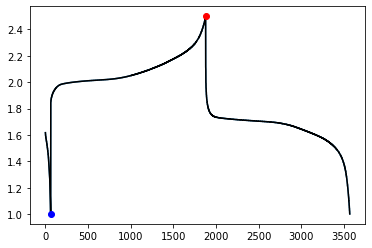

In [30]:
plt.plot(x,y)
plt.plot(x,y,'k-',label='original')
plt.plot(x[max_ids],y[max_ids],'ro',label='peak')
plt.plot(x[min_ids],y[min_ids],'bo',label='peak')
